In [1]:
%tensorflow_version 2.x

In [2]:
!wget https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip

--2020-11-16 06:20:49--  https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip [following]
--2020-11-16 06:20:49--  https://www.dropbox.com/s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc872c53cad65bf523bb51116be4.dl.dropboxusercontent.com/cd/0/inline/BDQ1N68jK_qiH6fKYETd7BvNJUeS3LPmOiifsiQlLhPhA6GUe4-Pm1_ohN3gndKec3RKCbYd9M4G-1A-D6ZC_mr5lwjMpFwoZ4gku3S5477QqA/file# [following]
--2020-11-16 06:20:50--  https://uc872c53cad65bf523bb51116be4.dl.dropboxusercontent.com/cd/0/inline/BDQ1N68jK_qiH6fKYETd7BvNJUeS3LPmOiifsiQlLh

In [3]:
!unzip '/content/state-farm-distracted-driver-detection.zip'

Archive:  /content/state-farm-distracted-driver-detection.zip
  inflating: sample_submission.csv   
  inflating: driver_imgs_list.csv    
  inflating: imgs.zip                


In [4]:
!unzip '/content/imgs.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/c7/img_56661.jpg  
  inflating: train/c7/img_56699.jpg  
  inflating: train/c7/img_56717.jpg  
  inflating: train/c7/img_56724.jpg  
  inflating: train/c7/img_56768.jpg  
  inflating: train/c7/img_56779.jpg  
  inflating: train/c7/img_56849.jpg  
  inflating: train/c7/img_56899.jpg  
  inflating: train/c7/img_56938.jpg  
  inflating: train/c7/img_5706.jpg   
  inflating: train/c7/img_57076.jpg  
  inflating: train/c7/img_57122.jpg  
  inflating: train/c7/img_57137.jpg  
  inflating: train/c7/img_5715.jpg   
  inflating: train/c7/img_57278.jpg  
  inflating: train/c7/img_57321.jpg  
  inflating: train/c7/img_57345.jpg  
  inflating: train/c7/img_57355.jpg  
  inflating: train/c7/img_5741.jpg   
  inflating: train/c7/img_57433.jpg  
  inflating: train/c7/img_5753.jpg   
  inflating: train/c7/img_57559.jpg  
  inflating: train/c7/img_57594.jpg  
  inflating: train/c7/img_5771.jpg   
  inflating: train/c7/img_57712.jpg  

# Import Libraries

In [5]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout

In [6]:
len(os.listdir('test'))

79726

In [8]:
print(len(os.listdir('/content/train/c0')))
print(len(os.listdir('/content/train/c1')))
print(len(os.listdir('/content/train/c2')))
print(len(os.listdir('/content/train/c3')))
print(len(os.listdir('/content/train/c4')))
print(len(os.listdir('/content/train/c5')))
print(len(os.listdir('/content/train/c6')))
print(len(os.listdir('/content/train/c7')))
print(len(os.listdir('/content/train/c8')))
print(len(os.listdir('/content/train/c9')))

2489
2267
2317
2346
2326
2312
2325
2002
1911
2129


No. of train images = 22,424
No. of test images = 79,726

In [9]:
model=Sequential()
model.add(Conv2D(32,(5,5),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation="relu"))

In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
#Test directory
%mkdir Test

In [16]:
#moving the test images to Test directory
!mv /content/test/  /content/Test

In [17]:
train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        subset='training'
        )

validation_generator = train_datagen.flow_from_directory(
        '/content/train',
         target_size=(64, 64),
         batch_size=32,
        class_mode='categorical',
         subset='validation'
        )


test_generator = test_datagen.flow_from_directory(
    '/content/Test',
        target_size=(64, 64),
        batch_size=2,
        shuffle=False,
        class_mode='categorical'
    
)

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.
Found 79726 images belonging to 1 classes.


In [18]:
type(test_generator)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [19]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS=validation_generator.n//train_generator.batch_size

# Fit

In [20]:
model.fit(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=VALIDATION_STEPS)

Epoch 1/10
560/560 [==============================] - 109s 195ms/step - loss: 3.6478 - accuracy: 0.1569 - val_loss: 3.3289 - val_accuracy: 0.3167
Epoch 2/10
560/560 [==============================] - 109s 195ms/step - loss: 2.5890 - accuracy: 0.2680 - val_loss: 1.6619 - val_accuracy: 0.3824
Epoch 3/10
560/560 [==============================] - 108s 194ms/step - loss: 2.0147 - accuracy: 0.2938 - val_loss: 1.7518 - val_accuracy: 0.3625
Epoch 4/10
560/560 [==============================] - 108s 193ms/step - loss: 2.1288 - accuracy: 0.2133 - val_loss: 1.8308 - val_accuracy: 0.3121
Epoch 5/10
560/560 [==============================] - 108s 193ms/step - loss: 1.7637 - accuracy: 0.4099 - val_loss: 1.6704 - val_accuracy: 0.4138
Epoch 6/10
560/560 [==============================] - 108s 193ms/step - loss: 1.7174 - accuracy: 0.4245 - val_loss: 1.6020 - val_accuracy: 0.4346
Epoch 7/10
560/560 [==============================] - 108s 193ms/step - loss: 1.5969 - accuracy: 0.4835 - val_loss: 1.2995 -

In [21]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization

In [22]:
mod = Sequential()
mod.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(64,64,3)))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.3))
mod.add(Conv2D(64,kernel_size=(5,5),activation='relu',padding='same'))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.3))
mod.add(Conv2D(128,kernel_size=(5,5),activation='relu',padding='same'))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.5))
mod.add(Flatten())
mod.add(Dense(units = 512,activation='relu'))
mod.add(BatchNormalization())
mod.add(Dropout(0.5))
mod.add(Dense(units = 128,activation='relu'))
mod.add(Dropout(0.25))
mod.add(Dense(10,activation='softmax'))

In [23]:
mod.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Validate

In [24]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS=validation_generator.n//train_generator.batch_size

In [25]:
model2=mod.fit(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=VALIDATION_STEPS)

Epoch 1/5
560/560 [==============================] - 109s 195ms/step - loss: 1.9156 - accuracy: 0.3505 - val_loss: 1.3017 - val_accuracy: 0.5205
Epoch 2/5
560/560 [==============================] - 109s 194ms/step - loss: 1.0995 - accuracy: 0.6076 - val_loss: 0.6631 - val_accuracy: 0.7701
Epoch 3/5
560/560 [==============================] - 108s 194ms/step - loss: 0.8060 - accuracy: 0.7192 - val_loss: 0.4722 - val_accuracy: 0.8484
Epoch 4/5
560/560 [==============================] - 108s 193ms/step - loss: 0.6169 - accuracy: 0.7918 - val_loss: 0.4293 - val_accuracy: 0.8594
Epoch 5/5
560/560 [==============================] - 108s 193ms/step - loss: 0.5244 - accuracy: 0.8224 - val_loss: 0.2523 - val_accuracy: 0.9163


In [26]:
%matplotlib inline  
import matplotlib.pyplot as plt

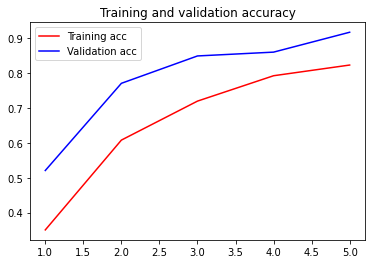

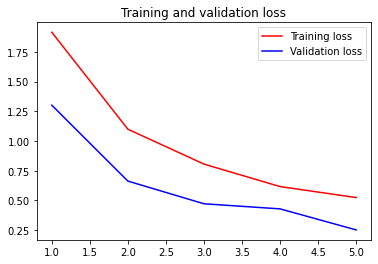

In [27]:
acc = model2.history['accuracy']
val_acc = model2.history['val_accuracy']
loss = model2.history['loss']
val_loss = model2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
#plotting train and validation losses
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [28]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=mod.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

Instructions for updating:
Please use Model.predict, which supports generators.
39863/39863 [==============================] - 354s 9ms/step


In [29]:
pred

array([[1.5044842e-06, 2.5966647e-09, 7.7312592e-08, ..., 8.2624723e-08,
        2.0478085e-06, 5.4680249e-06],
       [1.3845828e-06, 2.8254805e-08, 2.5244683e-08, ..., 2.0248966e-07,
        3.9214768e-07, 2.0777707e-05],
       [2.2656761e-01, 7.5359082e-01, 4.2528909e-06, ..., 4.3587076e-07,
        1.9684524e-04, 7.5460696e-03],
       ...,
       [2.9733149e-02, 2.8437139e-03, 2.8672939e-02, ..., 1.9311082e-03,
        1.4391917e-01, 1.4442834e-01],
       [2.3134382e-06, 3.2779539e-07, 1.1096269e-01, ..., 3.3581247e-05,
        2.3820631e-02, 2.4272781e-06],
       [1.1652509e-06, 1.2849453e-07, 6.3079582e-09, ..., 8.5089442e-11,
        3.2394114e-06, 7.6317682e-04]], dtype=float32)

In [30]:
len(pred)

79726

In [31]:
labels_test_predictions = pd.DataFrame(pred)
labels_test_predictions

,0,1,2,3,4,5,6,7,8,9
0,0.000002,2.596665e-09,7.731259e-08,2.703779e-07,6.749086e-07,0.999990,2.454153e-09,8.262472e-08,2.047808e-06,0.000005
1,0.000001,2.825480e-08,2.524468e-08,1.628672e-06,6.412380e-07,0.999975,2.557266e-09,2.024897e-07,3.921477e-07,0.000021
2,0.226568,7.535908e-01,4.252891e-06,8.433954e-03,3.579356e-03,0.000003,7.786698e-05,4.358708e-07,1.968452e-04,0.007546
3,0.165886,2.982663e-01,1.614021e-04,2.247830e-03,8.012196e-03,0.003932,9.889021e-03,6.784351e-04,2.577620e-02,0.485151
4,0.008378,4.099324e-06,1.651248e-05,8.524245e-01,1.151183e-01,0.016903,4.716079e-06,6.166212e-05,3.948574e-03,0.003141
...,...,...,...,...,...,...,...,...,...,...
79721,0.000407,9.920709e-01,1.330295e-04,4.726522e-06,7.226900e-06,0.000053,7.438760e-04,4.075918e-03,7.959817e-04,0.001709
79722,0.318475,4.911934e-01,2.451609e-04,6.707855e-02,4.912828e-05,0.000165,6.469632e-04,4.784109e-06,1.495844e-03,0.120647
79723,0.029733,2.843714e-03,2.867294e-02,6.997947e-02,5.321156e-01,0.000487,4.588934e-02,1.931108e-03,1.439192e-01,0.144428
79724,0.000002,3.277954e-07,1.109627e-01,1.650892e-09,1.018152e-05,0.000007,8.651609e-01,3.358125e-05,2.382063e-02,0.000002


In [32]:
labels_test_predictions.to_csv('Distracted_Driver_MultiAction_Classification.csv',index=False)

In [33]:
from google.colab import files
files.download("Distracted_Driver_MultiAction_Classification.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>